In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()

In [2]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
from sklearn import preprocessing
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [5]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


In [6]:
clusters_counts = []
fails_percents = []
eps_range = np.arange(0.1, 5, 0.5)
for eps in eps_range:
  clustering = DBSCAN(eps=eps).fit(scaled_data)
  clusters_counts.append(len(set(clustering.labels_)) - 1)
  fails_percents.append(list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100)

Text(0, 0.5, 'Количество кластеров')

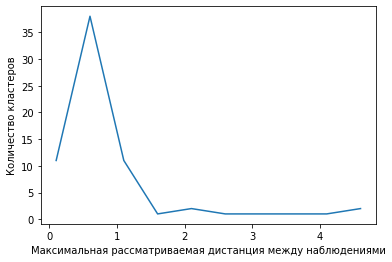

In [7]:
import matplotlib.pyplot as plt
plt.plot(eps_range, clusters_counts)
plt.xlabel("Максимальная рассматриваемая дистанция между наблюдениями")
plt.ylabel("Количество кластеров")

Text(0, 0.5, 'Процент не кластеризованных наблюдений')

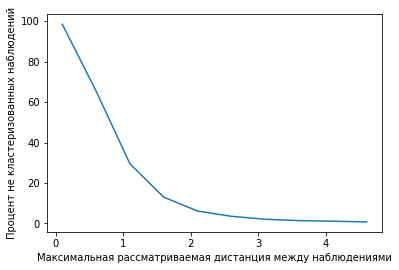

In [10]:
plt.plot(eps_range, fails_percents)
plt.xlabel("Максимальная рассматриваемая дистанция между наблюдениями")
plt.ylabel("Процент не кластеризованных наблюдений")

In [11]:
clusters_counts = []
fails_percents = []
min_samples_range = np.arange(2, 10)
for min_samples in min_samples_range:
  clustering = DBSCAN(min_samples=min_samples).fit(scaled_data)
  clusters_counts.append(len(set(clustering.labels_)) - 1)
  fails_percents.append(list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100)

Text(0, 0.5, 'Количество кластеров')

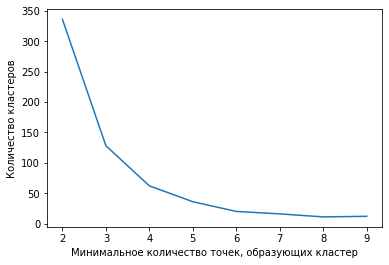

In [12]:
plt.plot(min_samples_range, clusters_counts)
plt.xlabel("Минимальное количество точек, образующих кластер")
plt.ylabel("Количество кластеров")

Text(0, 0.5, 'Процент не кластеризованных наблюдений')

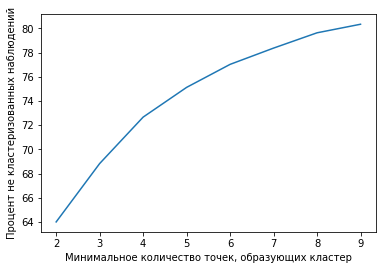

In [13]:
plt.plot(min_samples_range, fails_percents)
plt.xlabel("Минимальное количество точек, образующих кластер")
plt.ylabel("Процент не кластеризованных наблюдений")

In [22]:
def find_best():
  for eps in np.arange(0.5, 5, 0.5):
    for min_samples in np.arange(2, 10):
      clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
      clusters_count = len(set(clustering.labels_)) - 1
      fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
      if (clusters_count >= 5 and clusters_count <= 7 and fails_percent <= 12):
        print(eps, min_samples, clusters_count, fails_percent)
        return

In [23]:
find_best()

2.0 3 6 6.287633163501622


In [71]:
clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)

In [43]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(data)

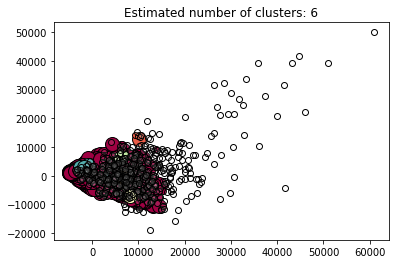

In [44]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
                col = [1, 1, 1, 0.1]
    class_member_mask = (labels == k)

    xy = pca_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [40]:
from sklearn.cluster import OPTICS

In [106]:
def find_best_optics():
  for max_eps in np.arange(0.5, 3, 0.5):
    for min_samples in np.arange(2, 5):
      clustering = OPTICS(max_eps=max_eps, min_samples=min_samples, cluster_method='dbscan').fit(scaled_data)
      clusters_count = len(set(clustering.labels_)) - 1
      fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
      if (clusters_count >= 5 and clusters_count <= 7 and fails_percent <= 12):
        print(max_eps, min_samples, clusters_count, fails_percent)
        return

In [107]:
find_best_optics()

2.0 3 6 6.310792033348772


In [113]:
clust = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)

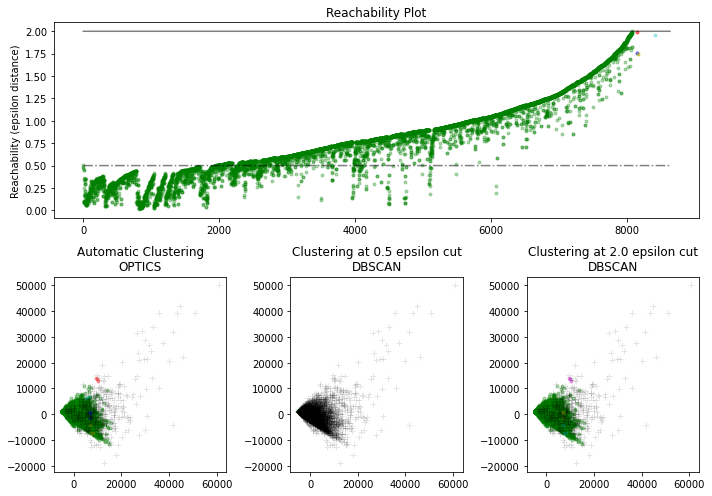

In [124]:
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

X = pca_data
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

In [132]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan', metric='cityblock').fit(scaled_data)
clusters_count = len(set(clustering.labels_)) - 1
fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
print(clusters_count, fails_percent)

55 39.49745252431681


In [133]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan', metric='cosine').fit(scaled_data)
clusters_count = len(set(clustering.labels_)) - 1
fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
print(clusters_count, fails_percent)

0 0.0


In [134]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan', metric='euclidean').fit(scaled_data)
clusters_count = len(set(clustering.labels_)) - 1
fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
print(clusters_count, fails_percent)

6 6.310792033348772


In [135]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan', metric='l1').fit(scaled_data)
clusters_count = len(set(clustering.labels_)) - 1
fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
print(clusters_count, fails_percent)

55 39.49745252431681


In [136]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan', metric='l2').fit(scaled_data)
clusters_count = len(set(clustering.labels_)) - 1
fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
print(clusters_count, fails_percent)

6 6.310792033348772


In [137]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan', metric='manhattan').fit(scaled_data)
clusters_count = len(set(clustering.labels_)) - 1
fails_percent = list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100
print(clusters_count, fails_percent)

55 39.49745252431681
